In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
from graphviz import Digraph
from IPython.display import display

In [2]:
tf.enable_eager_execution()

In [3]:
nodes = dict()
edges = []

def print_even_callback_(op_type, inputs, attrs, outputs, op_name):
    for _out in outputs:
        nodes[str(_out._id)] = str(op_type)
        OUT = str(_out._id)
    if len(outputs) == 0:
        OUT = str(op_type)
    for _in in inputs:
        if str(_in._id) not in nodes:
            nodes[str(_in._id)] = 'const'
        edges.append([str(_in._id), OUT])

In [4]:
tfe.add_execution_callback(print_even_callback_)

a = tfe.Variable(1.0)
x = tf.pow(2.0, a) - 3.0
y = tf.multiply(x, tf.add(4.0, 5.0))
z = tf.nn.softmax(tf.tile(tf.expand_dims(y, axis=-1), [2]))

tfe.clear_execution_callbacks()

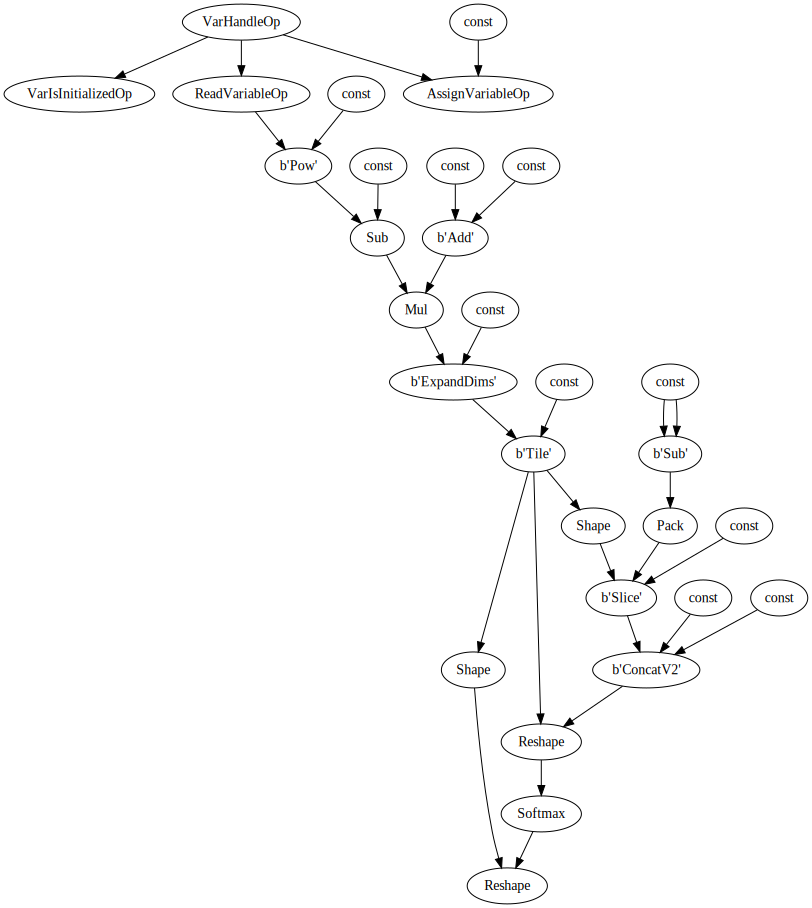

In [5]:
dot = Digraph(comment='The Round Table')
for k, v in nodes.items():
    dot.node(k, v)
for edge in edges:
    dot.edge(edge[0], edge[1])
dot